<a href="https://colab.research.google.com/github/futileresistance/dl/blob/master/MNIST_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings('ignore')
import random
import matplotlib.pyplot as plt
import idx2numpy as Inp
import seaborn as sns
import numpy as np

In [7]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
train_images, train_labels = Inp.convert_from_file('/content/gdrive/My Drive/train-images.idx3-ubyte'), \
                             Inp.convert_from_file('/content/gdrive/My Drive/train-labels.idx1-ubyte')
    
test_images, test_labels = Inp.convert_from_file('/content/gdrive/My Drive/t10k-images.idx3-ubyte'), \
                            Inp.convert_from_file('/content/gdrive/My Drive/t10k-labels.idx1-ubyte')

In [14]:
'Train set: Number of images {} sized {} x {}, number of labels {}'.format(*train_images.shape, train_labels.shape[0])

'Train set: Number of images 60000 sized 28 x 28, number of labels 60000'

In [15]:
'Test set: Number of images {} sized {} x {}, number of labels {}'.format(*test_images.shape, test_labels.shape[0])

'Test set: Number of images 10000 sized 28 x 28, number of labels 10000'

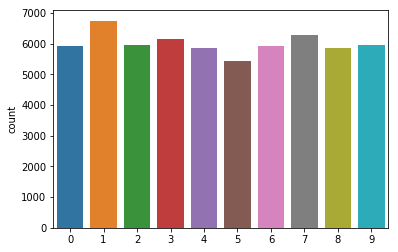

In [16]:
sns.countplot(train_labels)

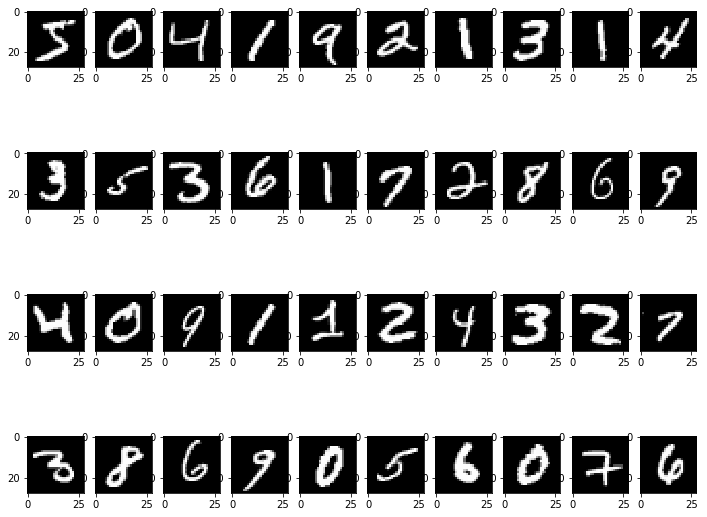

In [17]:
%matplotlib inline
# preview the images first
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(train_images[i,:,:].reshape((28,28)),interpolation='nearest', cmap='gray')
plt.show()

In [0]:
# Normalizing images
X_train = train_images.reshape(train_images.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_train/=255
X_test = test_images.reshape(test_images.shape[0],28,28,1)
X_test = X_test.astype('float32')
X_test/=255

In [20]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [0]:
datagen = ImageDataGenerator(zoom_range=0.2, # randomly zoom into images
                             rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
                             width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                             height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                             horizontal_flip=True,  # randomly flip images
                             vertical_flip=True)  # randomly flip images

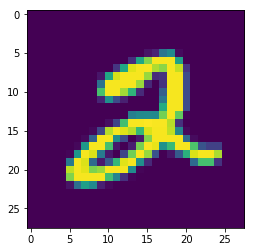

In [53]:
test_image = train_images[5,:,:]
plt.imshow(test_image)

In [0]:
def show_augmented(image, augmentation):
    aug = augmentation
    aug.fit(image.reshape(1,28,28,1))
    augmented = next(aug.flow(image.reshape(1,28,28,1), batch_size=1))
    plt.figure()
    plt.imshow(augmented.reshape(28,28))

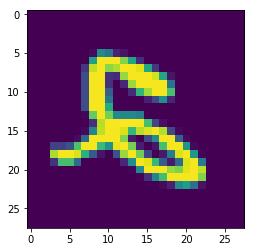

In [74]:
show_augmented(test_image,ImageDataGenerator(horizontal_flip=True) )

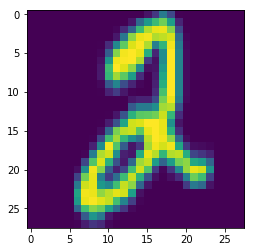

In [85]:
show_augmented(test_image,ImageDataGenerator(zoom_range=0.4))

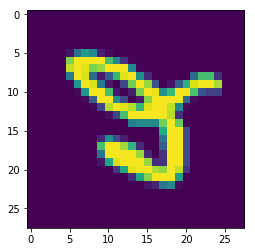

In [86]:
show_augmented(test_image,ImageDataGenerator(vertical_flip=True))

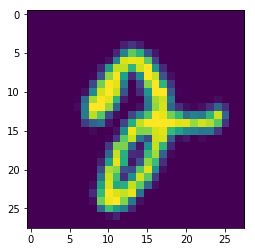

In [87]:
show_augmented(test_image,ImageDataGenerator(rotation_range=40))

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.20, random_state = 42)

In [0]:
X_train2 = np.array(X_train, copy=True) 
y_train2 = np.array(y_train, copy=True) 

datagen.fit(X_train)

# Concatenating the old images with the augmented images
augmented_x  = np.concatenate((X_train, X_train2), axis=0)
augmented_y  = np.concatenate((y_train, y_train2), axis=0)

In [26]:
X_train.shape, augmented_x.shape

((48000, 28, 28, 1), (96000, 28, 28, 1))

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [28]:
cnn_model = Sequential()

cnn_model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (28, 28, 1)))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Dropout(0.20))

cnn_model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Dropout(0.20))

cnn_model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Dropout(0.20))

cnn_model.add(Flatten())

cnn_model.add(Dense(256, activation = 'relu'))
cnn_model.add(Dropout(0.20))
cnn_model.add(Dense(10, activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [29]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [0]:
opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [0]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [33]:
history = cnn_model.fit(augmented_x, augmented_y, 
                    epochs = 20, batch_size = 32, 
                    validation_data = (X_val, y_val))

Train on 96000 samples, validate on 12000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
96000/96000 [==============================] - 20s 206us/sample - loss: 0.2148 - acc: 0.9324 - val_loss: 0.0614 - val_acc: 0.9822
Epoch 2/20
96000/96000 [==============================] - 15s 161us/sample - loss: 0.0807 - acc: 0.9757 - val_loss: 0.0528 - val_acc: 0.9851
Epoch 3/20
96000/96000 [==============================] - 16s 169us/sample - loss: 0.0615 - acc: 0.9816 - val_loss: 0.0448 - val_acc: 0.9867
Epoch 4/20
96000/96000 [==============================] - 15s 158us/sample - loss: 0.0516 - acc: 0.9844 - val_loss: 0.0526 - val_acc: 0.9850
Epoch 5/20
96000/96000 [==============================] - 15s 158us/sample - loss: 0.0443 - acc: 0.9858 - val_loss: 0.0419 - val_acc: 0.9888
Epoch 6/20
96000/96000 [==============================] - 15s 159us/sample - loss: 0.0404 - acc: 0.9875 - val_loss: 0.0468 - val_acc: 0.9879
Epoch 7/20
96000/96000 [==============================] 

In [0]:
model_history = history.history

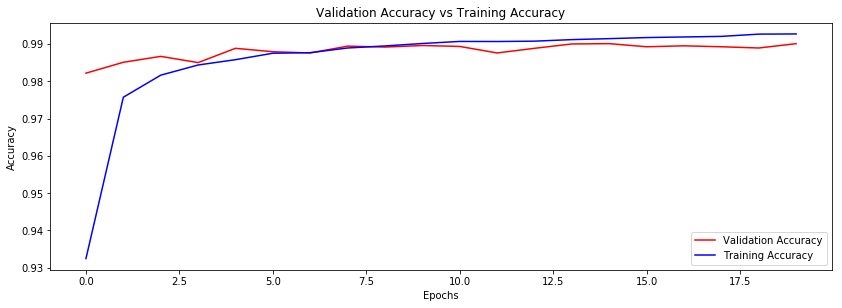

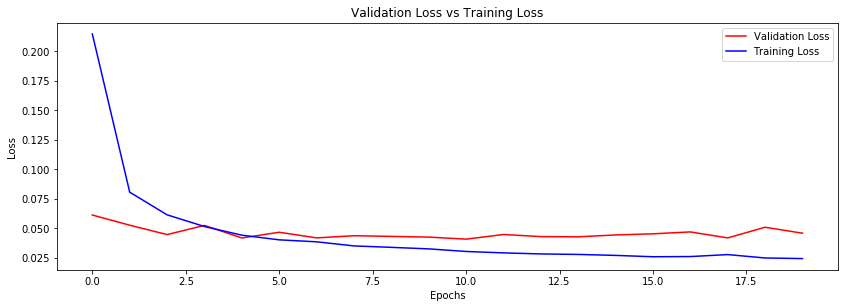

In [35]:
validation_accuracy = model_history['val_acc']
model_loss = model_history['loss']
validation_loss = model_history['val_loss']
model_accuracy = model_history['acc']
epochs = range(len(model_accuracy))


plt.figure(figsize = (14,10))
plt.subplot(211)
plt.plot(epochs, validation_accuracy, 'r', label = 'Validation Accuracy')
plt.plot(epochs, model_accuracy, 'b', label = 'Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy vs Training Accuracy')
plt.legend()


plt.figure(figsize = (14,10))
plt.subplot(212)
plt.plot(epochs, validation_loss, 'r', label = 'Validation Loss')
plt.plot(epochs, model_loss, 'b', label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss vs Training Loss')
plt.legend()

plt.show()

In [36]:
test_eval = cnn_model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

10000/10000 [==============================] - 1s 60us/sample - loss: 0.0450 - acc: 0.9895
Test loss: 0.04496037116794223
Test accuracy: 0.9895


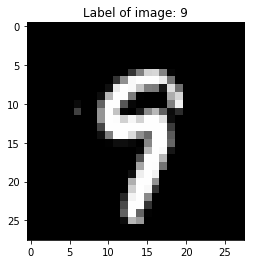

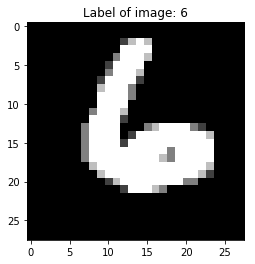

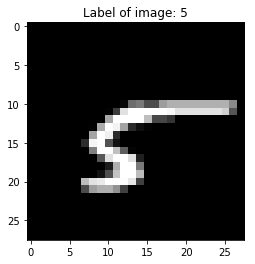

In [50]:
for i in range(3):
    random_sample = random.randint(1,len(y_test))
    test_img = X_test[random_sample].reshape(1,28,28,1)
    test_label = cnn_model.predict(test_img)
    title = 'Label of image: {}'.format(np.argmax(test_label))
    plt.figure()
    plt.imshow(X_test[random_sample].reshape(28,28), cmap='gray')
    plt.title(title)